# How do in-demand skills trend over time for Data Analysts?

In [9]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()   #filtering US jobs

## 🗓️ Prepare Data for Monthly Skill Trend Analysis

To analyze how skill demand changes over time for **U.S. Data Analyst roles**, I first prepare the dataset for monthly aggregation.

### Steps performed:
1. **Extract the month from the job posting date**  
   I create a new column (`job_posted_month`) from `job_posted_date` to enable month-by-month analysis.

2. **Explode the skills column**  
   Since each job posting contains multiple skills, I use `.explode()` on `job_skills` so that each row represents a single skill occurrence.

✅ This structured format allows skills to be grouped and analyzed accurately by month, making it possible to track trends in skill demand over time.


In [10]:
df_US_DA['job_posted_month'] = df_US_DA['job_posted_date'].dt.month   #extracting month from job_posted_date

df_US_DA_skills = df_US_DA.explode('job_skills')                     #exploding job_skills

df_US_DA_skills


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ...",1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ...",1


## 📊 Reshape and Organize Skill Data for Trend Analysis

To analyze how Data Analyst skill demand changes over time, I restructure the dataset into a monthly skill matrix.

### Steps performed:

1. **Create a pivot table**
   - Rows represent the **month a job was posted**
   - Columns represent individual **skills**
   - Cell values show how many times each skill appears in a given month
   - Missing values are filled with `0` to avoid gaps

2. **Rank skills by overall demand**
   - Compute total occurrences of each skill across all months
   - Sort skills from most to least demanded
   - Remove the temporary total row after sorting
3. **Format the month labels**
   - Convert numeric months into readable month names (e.g., Jan, Feb)
   - This improves clarity in later visualizations


✅ This transformation produces a clean, well-structured table that makes it easy to track and visualize **monthly trends in skill demand** for Data Analysts.


In [11]:
df_US_DA_skills_pivot = df_US_DA_skills.pivot_table(index = 'job_posted_month',
                            columns = 'job_skills',
                            aggfunc = 'size',
                            fill_value=0                    #filling missing values with 0
                            )

df_US_DA_skills_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


## *Rank skills by overall demand*
✅ This step guarantees that trend visualizations focus on the most important and widely requested skills.


In [12]:
df_US_DA_skills_pivot.loc['Total'] = df_US_DA_skills_pivot.sum()        #computing total occurrences of each skill

df_US_DA_skills_pivot = df_US_DA_skills_pivot[df_US_DA_skills_pivot.loc['Total'].sort_values(ascending=False).index]

df_US_DA_skills_pivot.drop('Total', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_8516\4055613690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_DA_skills_pivot.drop('Total', inplace=True)


## *Format the month labels*

In [13]:
df_US_DA_skills_pivot  #before formatting month labels

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_US_DA_skills_pivot = df_US_DA_skills_pivot.reset_index()  

df_US_DA_skills_pivot['job_posted_month'] = df_US_DA_skills_pivot['job_posted_month'].apply(lambda x : pd.to_datetime(x, format = '%m').strftime('%b'))
df_US_DA_skills_pivot = df_US_DA_skills_pivot.set_index('job_posted_month')

df_US_DA_skills_pivot #after formatting month labels

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
Feb,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
Mar,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
Apr,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
May,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
Jun,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
Jul,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
Aug,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
Sep,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


## 📈 Monthly Trends in Top In-Demand Skills for Data Analysts

To understand how demand for key Data Analyst skills evolves over time, I visualize the **top five most in-demand skills** on a monthly basis.

The line chart shows:
- Each line represents a **skill**
- The x-axis shows the **month**
- The y-axis shows the **number of job postings** mentioning that skill

✅ **Why this matters:**  
This visualization highlights which skills maintain consistent demand, which are growing, and which may be declining over time. It helps identify both stable core skills and emerging trends in the Data Analyst job market.


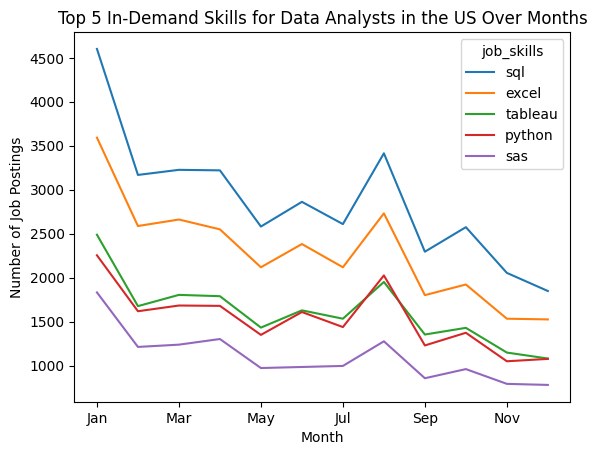

In [15]:
df_US_DA_skills_pivot.iloc[:, :5].plot(kind = 'line')         #plotting line graph for top 5 skills

plt.title('Top 5 In-Demand Skills for Data Analysts in the US Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')

plt.show()

## 📐 Normalize Skill Demand by Percentage

To accurately compare skill demand across months, I convert raw skill counts into **percentages of total job postings** for each month.

### Steps performed:
1. **Calculate total job postings per month**  
   I group Data Analyst job postings by `job_posted_month` to obtain the total number of postings in each month.

2. **Convert skill counts to percentages**  
   Each skill count is divided by the total monthly postings (scaled by 100), producing a normalized percentage value.

✅ This normalization ensures that variations in overall hiring volume do not distort trend comparisons, allowing for a clearer view of true changes in skill demand over time.


In [16]:
s_total = df_US_DA.groupby('job_posted_month').size().values        #total job postings per month

df_US_DA_skills_pivot_prcnt = df_US_DA_skills_pivot.iloc[:12].div(s_total/100, axis=0)         #percentage representation

df_US_DA_skills_pivot_prcnt

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028,0.000000,0.000000,0.000000,0.000000
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.000000,0.000000,0.017596,0.000000,0.000000,0.017596,0.017596,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 📈 Monthly Percentage Trends of Top 5 Data Analyst Skills (U.S.)

In this final step, I visualize the **monthly percentage trends** of the top five most in-demand Data Analyst skills in the United States.

### What this visualization shows:
- Each line represents a **skill**
- Values are shown as a **percentage of total monthly job postings**
- Line labels are placed directly at the end of each line for improved readability

### Design choices:
- Dashed lines are removed for clarity
- A consistent color palette is used to distinguish skills
- The y-axis is formatted as a percentage to reflect normalized values

✅ **Why this matters:**  
This chart clearly illustrates which skills maintain stable demand, which are increasing in importance, and which show declining trends over time—helping Data Analysts focus on skills that remain valuable in the evolving job market.


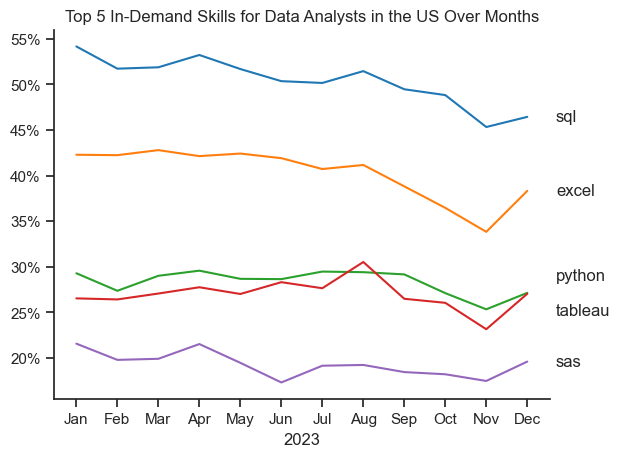

In [17]:
from matplotlib.ticker import PercentFormatter

sns.set_theme(style='ticks')
sns.lineplot(data=df_US_DA_skills_pivot_prcnt.iloc[:,:5],     
             dashes = False,                                  #removing dashes
             legend=False,
             palette='tab10',                                 #color palette
              )
sns.despine()

plt.title('Top 5 In-Demand Skills for Data Analysts in the US Over Months')
plt.xlabel('2023')
plt.ylabel('')

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))                   


offsets = {"python": 2, "tableau": -2.}  # ajuste si besoin

for i in range(5):
    skill = df_US_DA_skills_pivot_prcnt.columns[i]
    y = df_US_DA_skills_pivot_prcnt.iloc[-1, i] + offsets.get(skill, 0)   #ajustement

    plt.text(11.7, y, skill, va="center")                                 #ajout des labels de fin de ligne


plt.show()